# Evaluierung des Agents

#### Imports

In [1]:
import os
import torch
import numpy as np
from tqdm import tqdm
import gymnasium as gym
from gymnasium.wrappers import (
    FrameStack,
    GrayScaleObservation,
    ResizeObservation,
    RecordVideo
)

# Import custom modules
from src.helper_functions.create_ActionSpaceWrapper import ActionSpaceWrapper
from src.helper_functions.create_Agent import EpsilonGreedyAgent
from src.helper_functions.create_Plot import plot_results

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

#### Initialisierung aller Komponenten

In [2]:
action_space = [
    # No Operation
    0,
    # Right
    2,
    # Left
    3
]
stacking_number = 10
num_episodes = 10
model_path = os.path.join("models", "final_model_v2.pth")


eval_folder = os.path.join("res", "eval")
if not os.path.exists(eval_folder):
    os.makedirs(eval_folder)
vid_folder = os.path.join(eval_folder, "all_videos")
if not os.path.exists(vid_folder):
    os.makedirs(vid_folder)
plot_folder = os.path.join(eval_folder, "plots")
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

In [3]:
env = gym.make("ALE/Pong-v5", render_mode='rgb_array')
env = ActionSpaceWrapper(env, action_space)
env = RecordVideo(env, vid_folder, episode_trigger=lambda episode_id: True, video_length=0)
env = GrayScaleObservation(env)
env = ResizeObservation(env, shape=84)
env = FrameStack(env, num_stack=stacking_number)


state, _ = env.reset()
state_shape = state.shape

c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\.venv\Lib\site-packages\gymnasium\wrappers\record_video.py:94: UserWarning: WARN: Overwriting existing videos at c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\.venv\Lib\site-packages\gymnasium\utils\passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


In [4]:
agent = EpsilonGreedyAgent(state_shape=state_shape, num_actions=len(action_space), starting_point=model_path, checkpoint_folder=None, model_folder=None)
agent.epsilon = 0.0
agent.model.eval()

reward_list = []
steps_list = []
q_list = []
loss_list = []
epsilon_list = []

Model loaded from models\final_model_v2.pth with epsilon 0.01


#### Loop to watch the model play

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\src\helper_functions\create_Agent.py:104: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  state = torch.tensor(state, dtype=torch.float32, device=self.device)
  0%|          | 0/10 [01:21<?, ?it/s]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-0.mp4



 10%|█         | 1/10 [01:22<12:20, 82.23s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-0.mp4
Episode 1 abgeschlossen mit 5126 Schritten, Gesamtbelohnung: 1.0, Epsilon: 0.0




 10%|█         | 1/10 [02:24<12:20, 82.23s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-1.mp4



 20%|██        | 2/10 [02:25<09:26, 70.82s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-1.mp4
Episode 2 abgeschlossen mit 3970 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.0




 20%|██        | 2/10 [03:23<09:26, 70.82s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-2.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-2.mp4



 30%|███       | 3/10 [03:24<07:38, 65.53s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-2.mp4
Episode 3 abgeschlossen mit 3403 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.0




 30%|███       | 3/10 [04:35<07:38, 65.53s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-3.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-3.mp4



 40%|████      | 4/10 [04:35<06:47, 67.93s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-3.mp4
Episode 4 abgeschlossen mit 4157 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.0




 40%|████      | 4/10 [05:32<06:47, 67.93s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-4.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-4.mp4



 50%|█████     | 5/10 [05:33<05:20, 64.10s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-4.mp4
Episode 5 abgeschlossen mit 3463 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.0




 50%|█████     | 5/10 [06:20<05:20, 64.10s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-5.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-5.mp4



 60%|██████    | 6/10 [06:21<03:54, 58.68s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-5.mp4
Episode 6 abgeschlossen mit 2857 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.0




 60%|██████    | 6/10 [07:26<03:54, 58.68s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-6.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-6.mp4



 70%|███████   | 7/10 [07:26<03:02, 60.92s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-6.mp4
Episode 7 abgeschlossen mit 4020 Schritten, Gesamtbelohnung: 10.0, Epsilon: 0.0




 70%|███████   | 7/10 [08:31<03:02, 60.92s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-7.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-7.mp4



 80%|████████  | 8/10 [08:31<02:04, 62.21s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-7.mp4
Episode 8 abgeschlossen mit 4029 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.0




 80%|████████  | 8/10 [09:16<02:04, 62.21s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-8.mp4



 90%|█████████ | 9/10 [09:16<00:56, 56.79s/it]

Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-8.mp4
Episode 9 abgeschlossen mit 2780 Schritten, Gesamtbelohnung: 14.0, Epsilon: 0.0




 90%|█████████ | 9/10 [10:25<00:56, 56.79s/it]

Moviepy - Building video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-9.mp4.
Moviepy - Writing video c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-9.mp4



100%|██████████| 10/10 [10:25<00:00, 62.59s/it]


Moviepy - Done !
Moviepy - video ready c:\Users\nicho\OneDrive\Dokumente\A - DHBW\6. Semester\RL\Abgaben\Reinforcement-Learning-Pong-Agent\res\eval\all_videos\rl-video-episode-9.mp4
Episode 10 abgeschlossen mit 4294 Schritten, Gesamtbelohnung: 9.0, Epsilon: 0.0




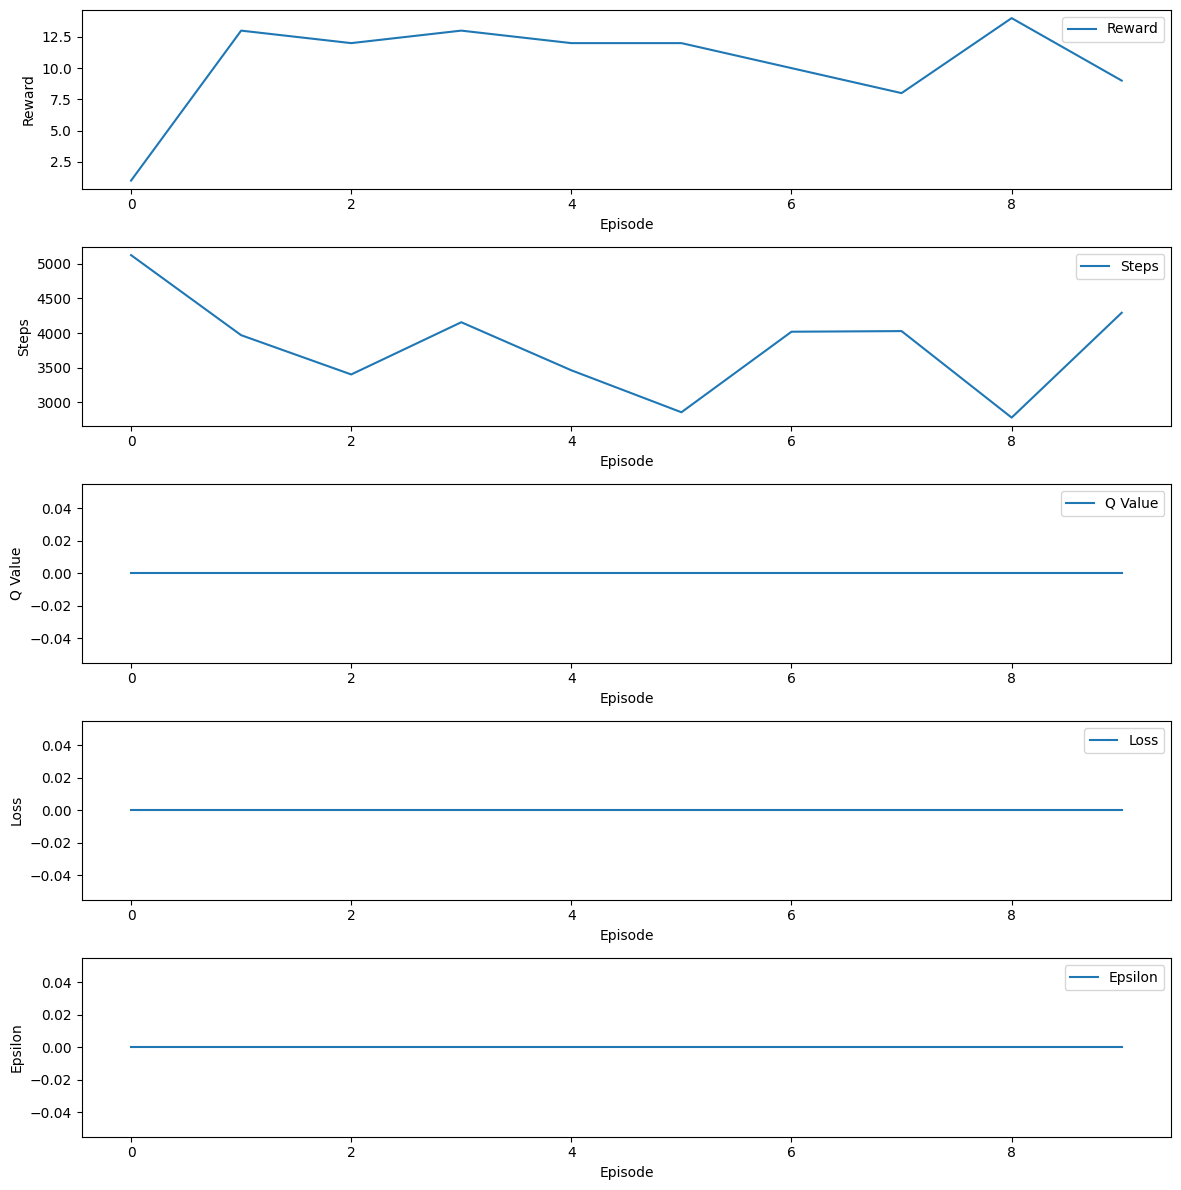

In [5]:
for episode in tqdm(range(1, num_episodes + 1)):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    mean_episode_q = []
    mean_episode_loss = []
    resetnow = False
    # Initiate loop for the current episode to play the game until it ends
    while resetnow==False:
        # To visualize the game
        env.render()
        action = agent.selectAction(state)
        next_state, reward, resetnow, truncated, info = env.step(action)
        resetnow = resetnow or truncated
        agent.saveExp(state, action, next_state, reward, resetnow)
        q, loss = agent.learn_get_TDest_loss()
        state = next_state
        total_reward = total_reward + reward
        steps = steps + 1
        mean_episode_q.append(q)
        mean_episode_loss.append(loss)
    print(
        f"Episode {episode} abgeschlossen mit {steps} Schritten, Gesamtbelohnung: {total_reward}, Epsilon: {agent.epsilon}\n\n"
    )
    # Save the results of the current episode
    reward_list.append(total_reward)
    steps_list.append(steps)
    q_list.append(np.mean(mean_episode_q))
    loss_list.append(np.mean(mean_episode_loss))
    epsilon_list.append(agent.epsilon)

# Plot the results of all episodes at the defined intervals
plot_results(
    reward_list,
    steps_list,
    q_list,
    loss_list,
    epsilon_list,
    os.path.join(plot_folder, f"plot_{episode}.png"),
)

# Close the environment
env.close()